# Data Preprocessing

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np

In [2]:
#reading data
data = pd.read_csv("housing_prices.csv")

In [3]:
#first quartile
q1 = data['Sale Price'].quantile(0.25)
#third quartile
q3 = data['Sale Price'].quantile(0.75)

In [4]:
#Interquartile Range

iqr = q3-q1
iqr 

323050.0

In [5]:
#defining upper limit and lower limits


ulim = q3 + 1.5*iqr
llim = q1 - 1.5*iqr
ulim,llim

(1129575.0, -162625.0)

In [6]:
#defining the imputer function

def lim_imputer(x):
    if x > ulim:
        return ulim
    if x < llim:
        return llim
    else:
        return x
    

In [7]:
#applying the imputer function to treat outliers

data['Sale Price'] = data['Sale Price'].apply(lim_imputer)
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [8]:
data2 = pd.read_csv("Raw_Housing_Prices1.csv")
data2['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [9]:
#removing missing values in the target variable

data2.dropna(inplace = True, axis = 0, subset = ['Sale Price'])

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [11]:
import matplotlib.pyplot as plt

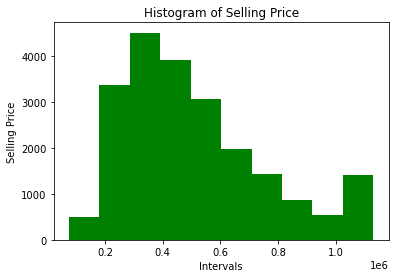

In [14]:
plt.hist(data2['Sale Price'],bins = 10, color = 'green')
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

#data is skewed towards the left

In [15]:
#defining list of columns with missing values

num_cols = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']

In [16]:
#imputing values using median imputer


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data2[num_cols] = imputer.fit_transform(data2[num_cols])

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [18]:
#reshaping Zipcode column for imputing

column = data2['Zipcode'].values.reshape(-1,1)

In [19]:
imp2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data2['Zipcode'] = imp2.fit_transform(column)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [20]:
#changing data type of Zipcode to 'Object'

data2['Zipcode'] = data2['Zipcode'].astype(object)

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [22]:
#mapping numerical values to column 'No of Times Visited'

mapping = {
    'None' : '0',
    'Once' : '1',
    'Twice' : '2',
    'Thrice' : '3',
    'Four' : '4'
}

data2['No of Times Visited'] = data2['No of Times Visited'].map(mapping)

In [23]:
#defining new column 'Years Since Renovation' and calculating the values

data2['Ever Renovate'] = np.where(data2['Renovated Year'] == 0,'No', 'Yes')

In [24]:
data2['Purchase Year'] = pd.DatetimeIndex(data2['Date House was Sold']).year

In [25]:
data2['Years Since Renovation'] = np.where(data2['Ever Renovate'] == 'Yes',abs(data2['Purchase Year'] - data2['Renovated Year']),0)

In [26]:
data2

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,...,9,0,98103.0,47.6993,-122.346,1530.0,1509,No,2017,0
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,...,4,0,98146.0,47.5107,-122.362,1830.0,7200,No,2016,0
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,...,9,0,98144.0,47.5944,-122.299,1020.0,2007,No,2017,0
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,...,14,0,98027.0,47.5345,-122.069,1410.0,1287,No,2016,0


In [27]:
#deleting columns that ae not required

data2.drop(columns = ['Purchase Year','Date House was Sold', 'Renovated Year'],inplace = True)

In [28]:
data2

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [29]:
#deleting ID column

data2.drop(columns = ['ID'], inplace = True)

In [30]:
#renaming columns for python processing

data2 = data2.rename(columns = {'Sale Price': 'Sale_Price'})
data2 = data2.rename(columns = {'Condition of the House': 'Condition_of_the_House'})
data2 = data2.rename(columns = {'Ever Renovate': 'Ever_Renovated'})
data2 = data2.rename(columns = {'Waterfront View': 'Waterfront_View'})

In [31]:
data2

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [32]:
#creating dummy variables for column 'Condition of the House'

data2 = pd.get_dummies(data2, columns = ['Condition_of_the_House'], drop_first = True)

In [33]:
data2

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,8,1530.0,...,47.6993,-122.346,1530.0,1509,No,0,0,1,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,8,2310.0,...,47.5107,-122.362,1830.0,7200,No,0,0,1,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,7,1020.0,...,47.5944,-122.299,1020.0,2007,No,0,0,1,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,8,1600.0,...,47.5345,-122.069,1410.0,1287,No,0,0,1,0,0


In [34]:
#creating dummy variables for columns 'Ever Renovates' and 'Waterfront View'


data2 = pd.get_dummies(data2, columns = ['Ever_Renovated','Waterfront_View'], drop_first = True)

In [35]:
data2

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,-122.346,1530.0,1509,0,0,1,0,0,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,-122.362,1830.0,7200,0,0,1,0,0,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,-122.299,1020.0,2007,0,0,1,0,0,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,-122.069,1410.0,1287,0,0,1,0,0,0,0


In [36]:
ziptable = data2.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending = True)
ziptable.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [37]:
#Binning the Zipcode values


ziptable['Zipcode_Group'] = pd.cut(ziptable['Sale_Price'], bins = 10,
                                  labels = [
                                      'Zipcode_Group_0',
                                      'Zipcode_Group_1',
                                      'Zipcode_Group_2',
                                      'Zipcode_Group_3',
                                      'Zipcode_Group_4',
                                      'Zipcode_Group_5',
                                      'Zipcode_Group_6',
                                      'Zipcode_Group_7',
                                      'Zipcode_Group_8',
                                      'Zipcode_Group_9'
                                  ],include_lowest = True)
ziptable = ziptable.drop(columns = 'Sale_Price')

In [38]:
#merging into original data

data2 = pd.merge(data2,ziptable, left_on = 'Zipcode', how = 'left', right_index = True)

In [39]:
data2 = data2.drop(columns = 'Zipcode')

In [40]:
data2

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,1530.0,1509,0,0,1,0,0,0,0,Zipcode_Group_3
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,1830.0,7200,0,0,1,0,0,0,0,Zipcode_Group_1
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,1020.0,2007,0,0,1,0,0,0,0,Zipcode_Group_3
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,1410.0,1287,0,0,1,0,0,0,0,Zipcode_Group_4


In [41]:

data2 = pd.get_dummies(data2, columns = ['Zipcode_Group'], drop_first = True)

In [59]:
data2.to_csv('Transformed_Housing_Data_2.csv',index = False)